__Ejercicio 2__. Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$:
$$\epsilon=\left|\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)}\right|,$$
respecto a $h$.

In [4]:
using Calculus

In [5]:
function derivadanumerica(f,x,h)
    x1=x+h
    Numerador=f(x1)-f(x)
    Derivada=Numerador/h
    return Derivada
end

derivadanumerica (generic function with 1 method)

In [6]:
conjunto=linspace(0,1,10000001)

0.0:1.0e-7:1.0

In [7]:
r=rand(conjunto)

0.9330024

In [8]:
function comparacion(conjunto,f) #es la funcion para comparar los valores de mi funcion creada en el ejercicio 1 y la derivada real de la función
    D=[] #voy a crear 4 conjuntos vacios para ir guardando mis resultados de cada paso con push!
    Real=[]
    H=[]
    E=[]
    r=rand(conjunto)#r me va a dar un número aleatorio de mi conjunto previamente definido, de 0 a 1 y será la r a entrar a mi función del ejericio 1
    for i in 1:10 #voy a ir variando h y eso ira reduciendo a la menos 1 cada vez mi h.
        h=1*(10.0^(-i)) 
        j=1/h #esto solo va a ser para cumplir el requisito de graficar contra 1/h
    d=derivadanumerica(f,r,h) #aqui uso el valor que me da mi función
    real=f'(r) #voy a calcular el valor real de la derivada de la función en el punto r
        error=(d-real)/real #voy a calcular el error
        push!(E,error) #Voy a rellenar estos conjuntos con los valores calculados
        push!(D,d)
        push!(Real,real)
        push!(H,j)
    end
scatter(H, D, color="red") #voy a imprimir estos valores
    scatter(H, Real, color="green")
    scatter(H,E,color="gold")
end
    

comparacion (generic function with 1 method)

In [9]:
using PyPlot

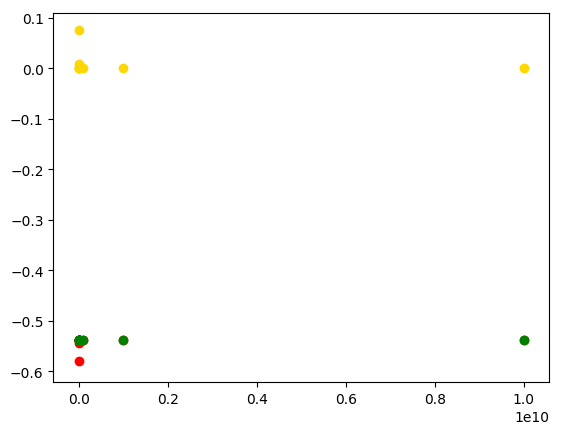

PyObject <matplotlib.collections.PathCollection object at 0x7f66d041a050>

In [10]:
comparacion(conjunto,cos)

Ejercicio 3. Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

Por lo que hemos visto, para poder calcular derivadas más parecidas a las "reales", se deben usar h de tamaño infinitesimal; esto para poder observar de mejor manera los cambios; ya que si tenemos tamaños de paso h muy grande; como sólo se calcula por puntos; a mayor número de puntos, mejor podemos describir como se comporta la función.
Ya que en curvas si se pierden datos.

¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series?

$$
f'(x)=\frac{f(x+h)-f(x-h)}{2h}.
$$

__Ejercicio 4__. Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.


In [26]:
function derivadasimetrica(f,x,h)
    num=f(x+h)-f(x-h)
    ds=(num/2h)
    return ds
end

derivadasimetrica (generic function with 1 method)

In [34]:
function comparacionejercicio4(f,x)
    D=[]
    A=[]
    P=[]
    E=[]
    for i in 1:10 #voy a ir variando h y eso ira reduciendo a la menos 1 cada vez mi h.
        h=1*(10.0^(-i)) 
        push!(P,i) #Aqui voy a ir guardando el paso, para ver como se aproxima en cada paso
    d=derivadasimetrica(f,x,h) #aqui uso el valor que me da mi función
    real=f'(x) #voy a calcular el valor real de la derivada de la función en el punto r
        error=d-real
        push!(E,error)
        push!(A,d) #guardo el valor calculado por mmi funcion
        push!(D,real) #guardo el valor real
            end
    scatter(P, D, color="red") #voy a imprimir el paso vs el valor real
    scatter(P, A, color="green") #voy a imprimir el paso vs mi aproximacion
    
end

comparacionejercicio4 (generic function with 2 methods)

In [28]:
derivadasimetrica(cos,1,0.1)

-0.8400692342254353

In [29]:
derivadasimetrica(cos,1,0.01)

-0.8414569603616029

In [30]:
derivadasimetrica(cos,1,0.001)

-0.8414708445627084

In [31]:
derivadasimetrica(cos,1,0.0001)

-0.841470983405368

In [32]:
g=cos'(1)

-0.8414709847974693

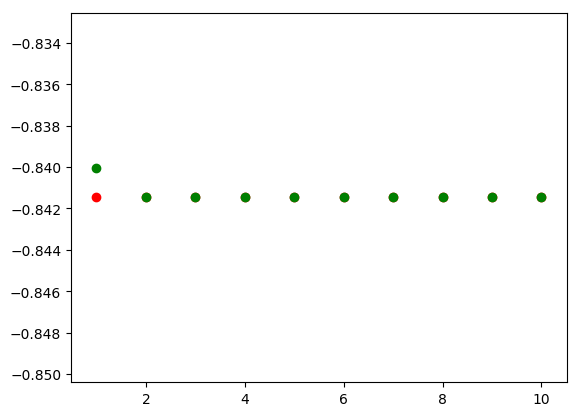

PyObject <matplotlib.collections.PathCollection object at 0x7f66d0076350>

In [35]:
comparacionejercicio4(cos,1)